In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt 

In [3]:
def showImage(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Working on  run
FPS for clip 9.08
(498, 407, 3)


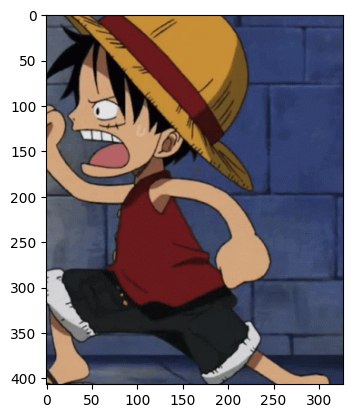

498 407 3
(498, 407, 3)


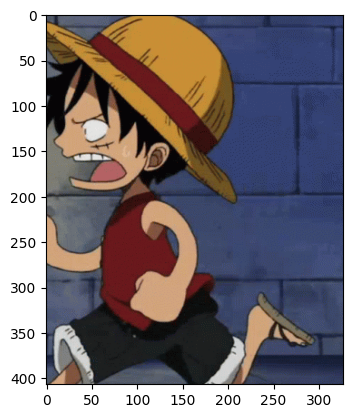

498 407 3
(498, 407, 3)


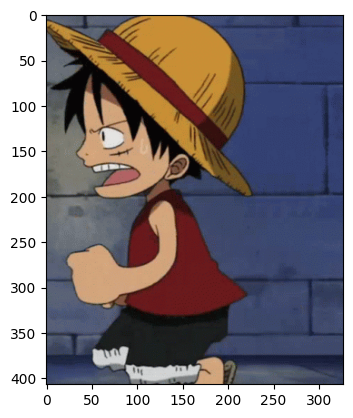

498 407 3
(498, 407, 3)


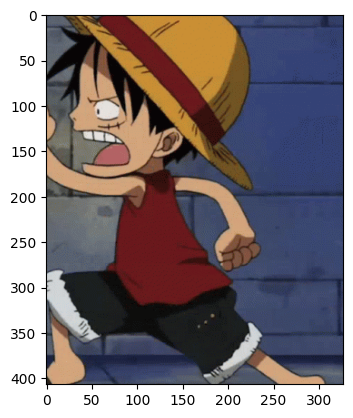

498 407 3
(498, 407, 3)


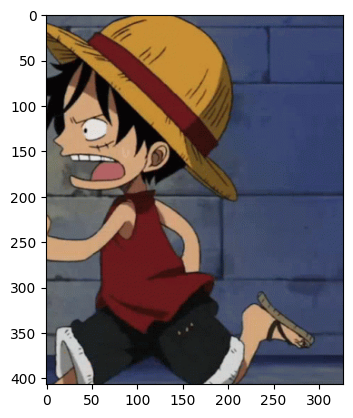

498 407 3
(498, 407, 3)


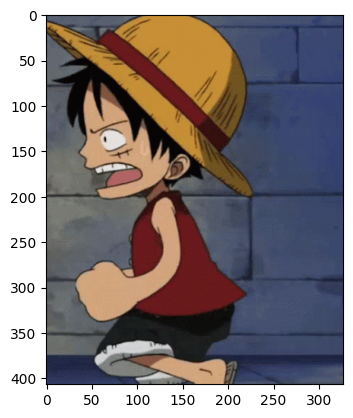

498 407 3
6


In [7]:
import math

from moviepy.editor import VideoFileClip, AudioFileClip, CompositeAudioClip
from moviepy.audio.AudioClip import AudioArrayClip
import numpy as np


for name in ["run"]:
    print("Working on ", name)
    inp = VideoFileClip(f"./data/{name}.gif")
    print("FPS for clip", inp.fps)
    cap = cv2.VideoCapture(f"./data/{name}.gif")
    success = cap.grab() # get the next frame
    fno = 0
    sample_rate = 1

    _, frame = cap.retrieve()

    fshape = frame.shape
    fheight = fshape[0]
    fwidth = fshape[1]
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     out = cv2.VideoWriter(f'./data/{name}_noaudio.avi', fourcc, inp.fps, (fwidth,fheight))

    fno = 0
#     keep = [3,6,8,12,15]
    while success:
        _, img = cap.retrieve()
        success = cap.grab()
        fno+=1
#         if fno<=2:
#             continue
#         if (fno-2)%4 != 0:
#             continue
#         if not fno in keep:
#             continue
        print(img.shape)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grad_x = cv2.Sobel(img, -1, dx=1, dy=0, ksize=3)
        grad_y = cv2.Sobel(img, -1, dx=0, dy=1, ksize=3)
        abs_grad_x = cv2.convertScaleAbs(grad_x)
        abs_grad_y = cv2.convertScaleAbs(grad_y)
        grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#         canny = cv2.Canny(gray, 50, 150)
        ret, mask = cv2.threshold(grad, 70, 255, cv2.THRESH_BINARY_INV)
#         out.write(img)
        startY, startX = 0, 80
        cropped = img[startY:407+startY,startX:407+startX,:]
        
        cv2.imwrite(f'./data/{name}/Image_000{fno}.png',  cv2.resize(cropped, (720,720), cv2.INTER_LANCZOS4))
        time = fno / inp.fps
        
        showImage(cropped);
        height, width, channels = img.shape 
        print(height, width, channels)
    
    print(fno)
#     out.release()
    cap.release()

#     vid = VideoFileClip(f'./data/{name}_noaudio.avi')



#     vid.write_videofile(f"./data/{name}_final.mp4", fps=inp.fps, codec="libx264")
